In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Load the pickle file
# file_path = "evaluation_results_old/neuron_responses/model-25_step-20_lr-1e-05_complex_residual_False.pkl"  # Replace with the path to your pickle file
file_path = "evaluation_results/neuron_responses/model-10_step-20_lr-1e-05_complex_residual-False_neuron-layers-5_neuron-size-10.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract predictions and targets dictionaries
predictions = data['predictions']
targets = data['targets']

# Select the example index you want
# example_idx = 4


In [2]:
# Interactive function to update the plot
def plot_neuron_activities(example_idx, neuron_start=0, neurons_to_show=10, save_fig=False):
    # Define the main 2x2 grid figure
    fig, big_axes = plt.subplots(2, 2, figsize=(15, neurons_to_show*6))
    fig.suptitle(f'Overlayed Neuron Activities for Each Layer (Example {example_idx})', y=1.02)

    # Flatten the big_axes array for easy access
    big_axes = big_axes.flatten()

    # Loop over each layer and plot in a separate subplot grid cell
    for idx, (layer_name, pred_data) in enumerate(predictions.items()):
        # Select data for the specific example
        target_data = targets[layer_name][example_idx]  # Shape: (time, neurons)
        pred_data = pred_data[example_idx]              # Shape: (time, neurons)

        # Plot neurons within the selected range
        for neuron_idx in range(neuron_start, min(neuron_start + neurons_to_show, pred_data.shape[1])):
            ax = fig.add_subplot(2 * neurons_to_show, 2, (1 + (idx % 2) + (idx // 2) * (neurons_to_show * 2) + (neuron_idx - neuron_start) * 2))
            
            sns.lineplot(x=np.arange(pred_data.shape[0]), y=pred_data[:, neuron_idx], ax=ax, label='Prediction', color='blue')
            sns.lineplot(x=np.arange(target_data.shape[0]), y=target_data[:, neuron_idx], ax=ax, label='Target', color='red')
            
            # Set title and labels
            if neuron_idx == neuron_start:
                ax.set_title(f'Layer: {layer_name}')
            ax.set_ylabel(f'Neuron {neuron_idx}')
            ax.set_ylim(-0.2, 1.2)  # Set y-axis range from 0 to 1

        # Set x-axis label only for the bottom-most neuron in each layer plot
        ax.set_xlabel('Time')

    # Adjust layout and show the final figure
    plt.tight_layout(pad=0.01)
    if save_fig:
        plt.savefig(f"plot_images/neuron_activities_example_{example_idx}.png", bbox_inches="tight")
    else:
        plt.show()


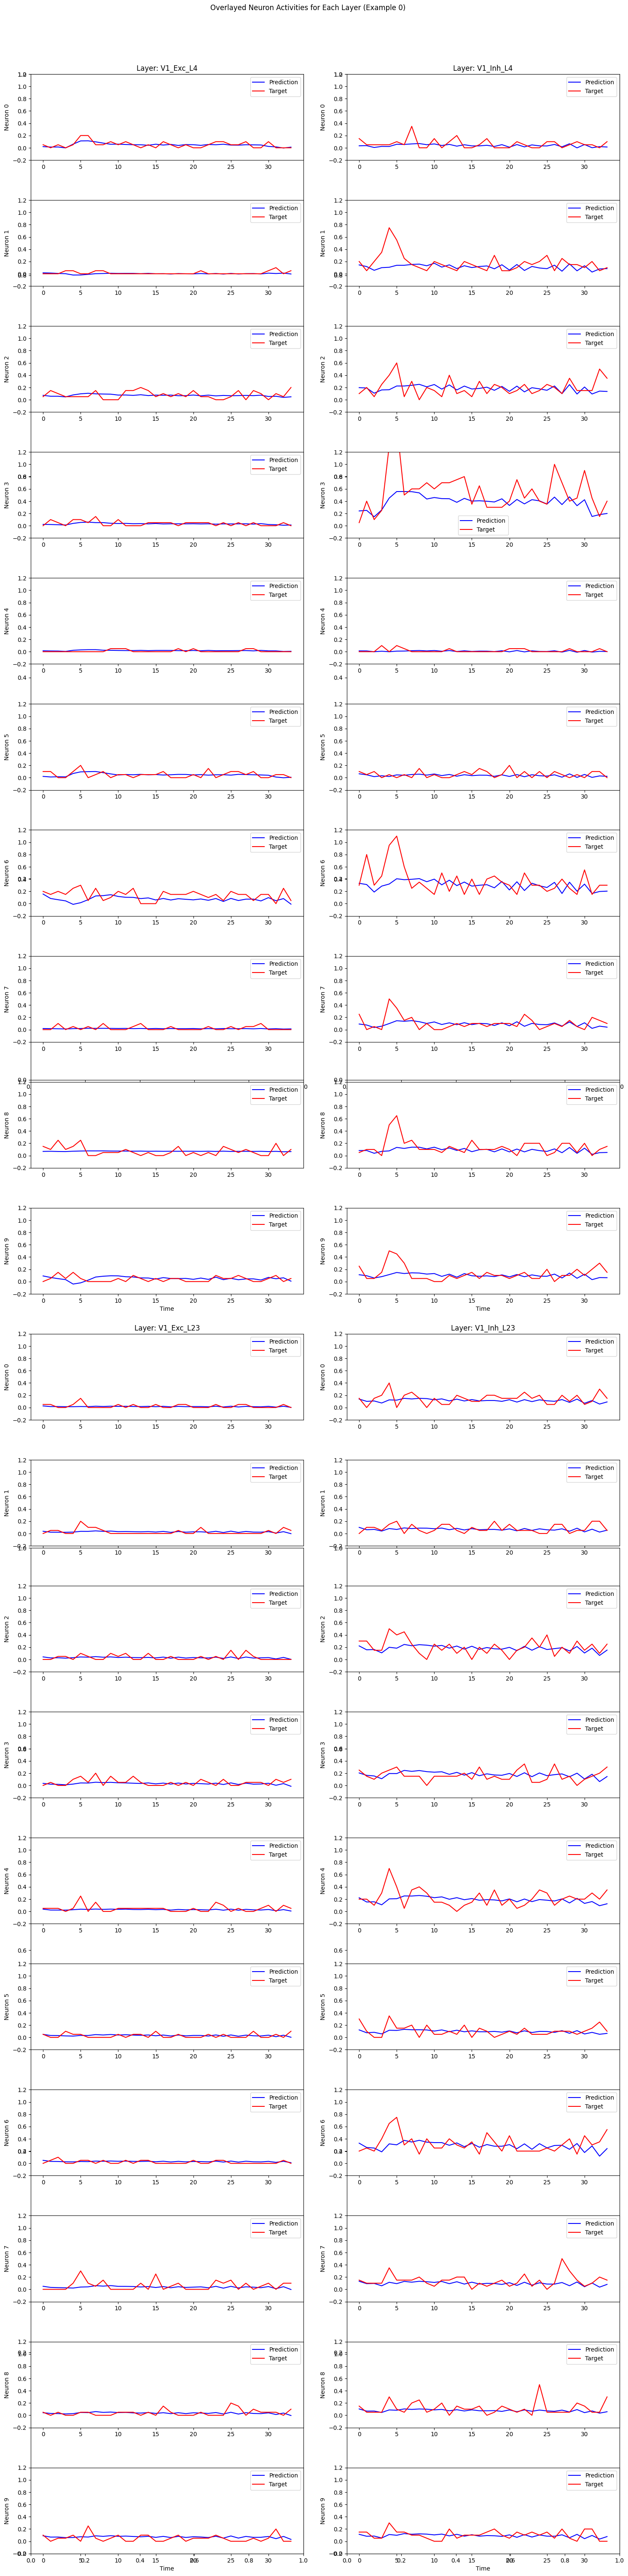

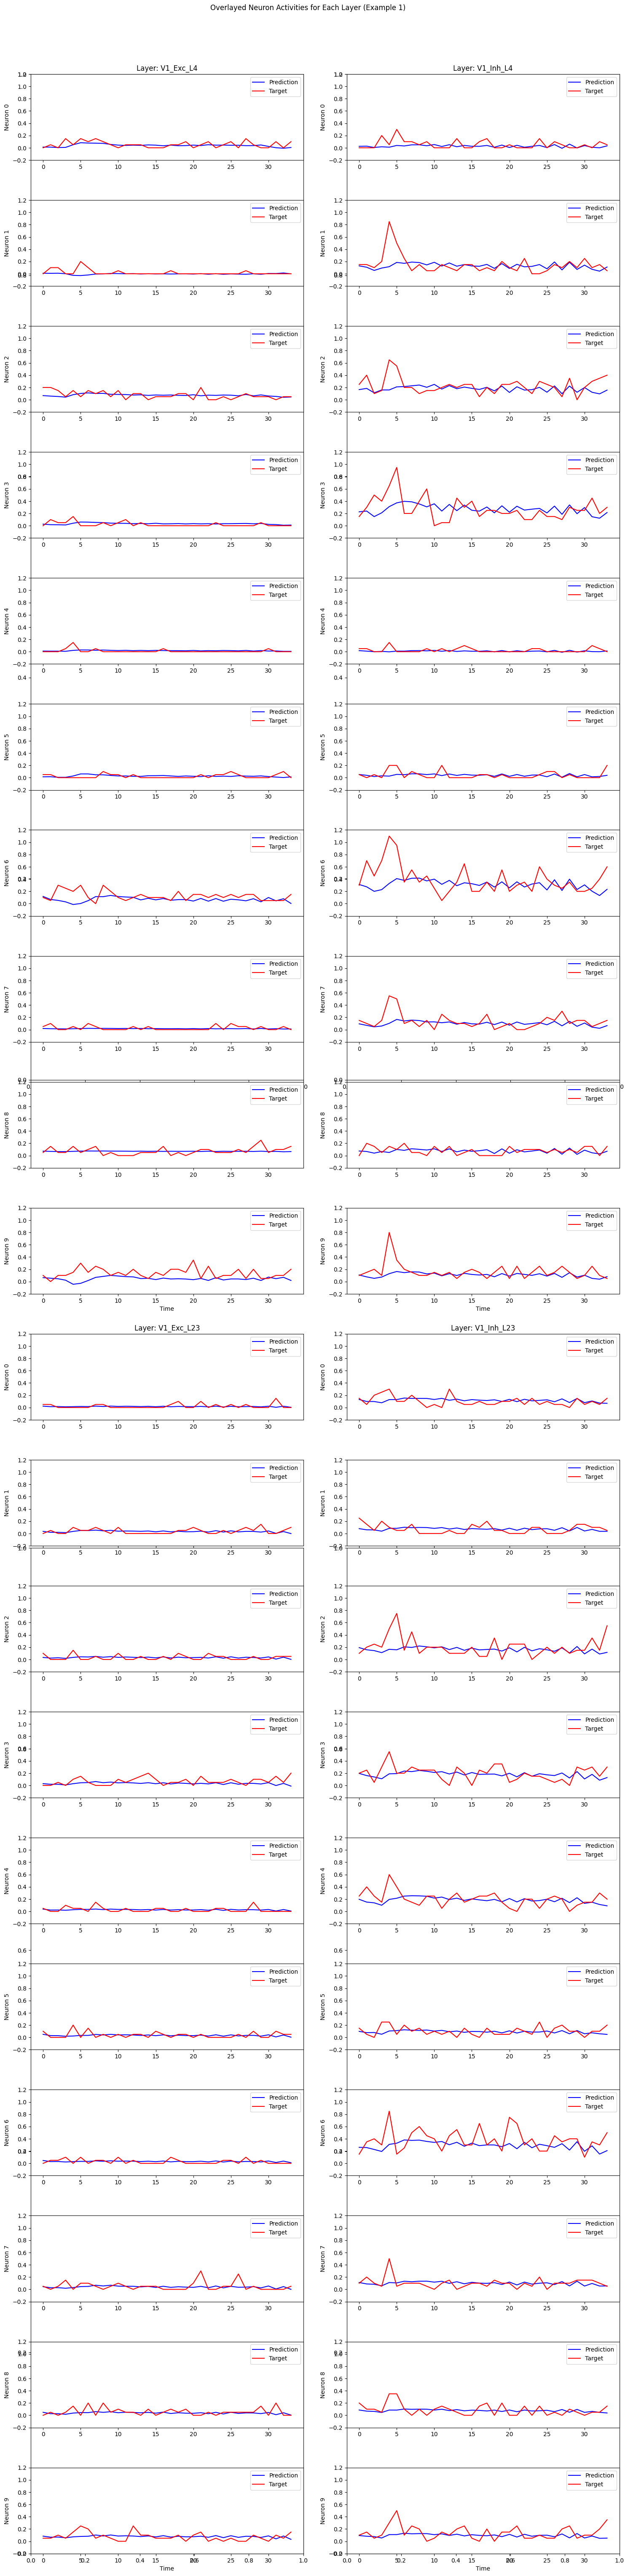

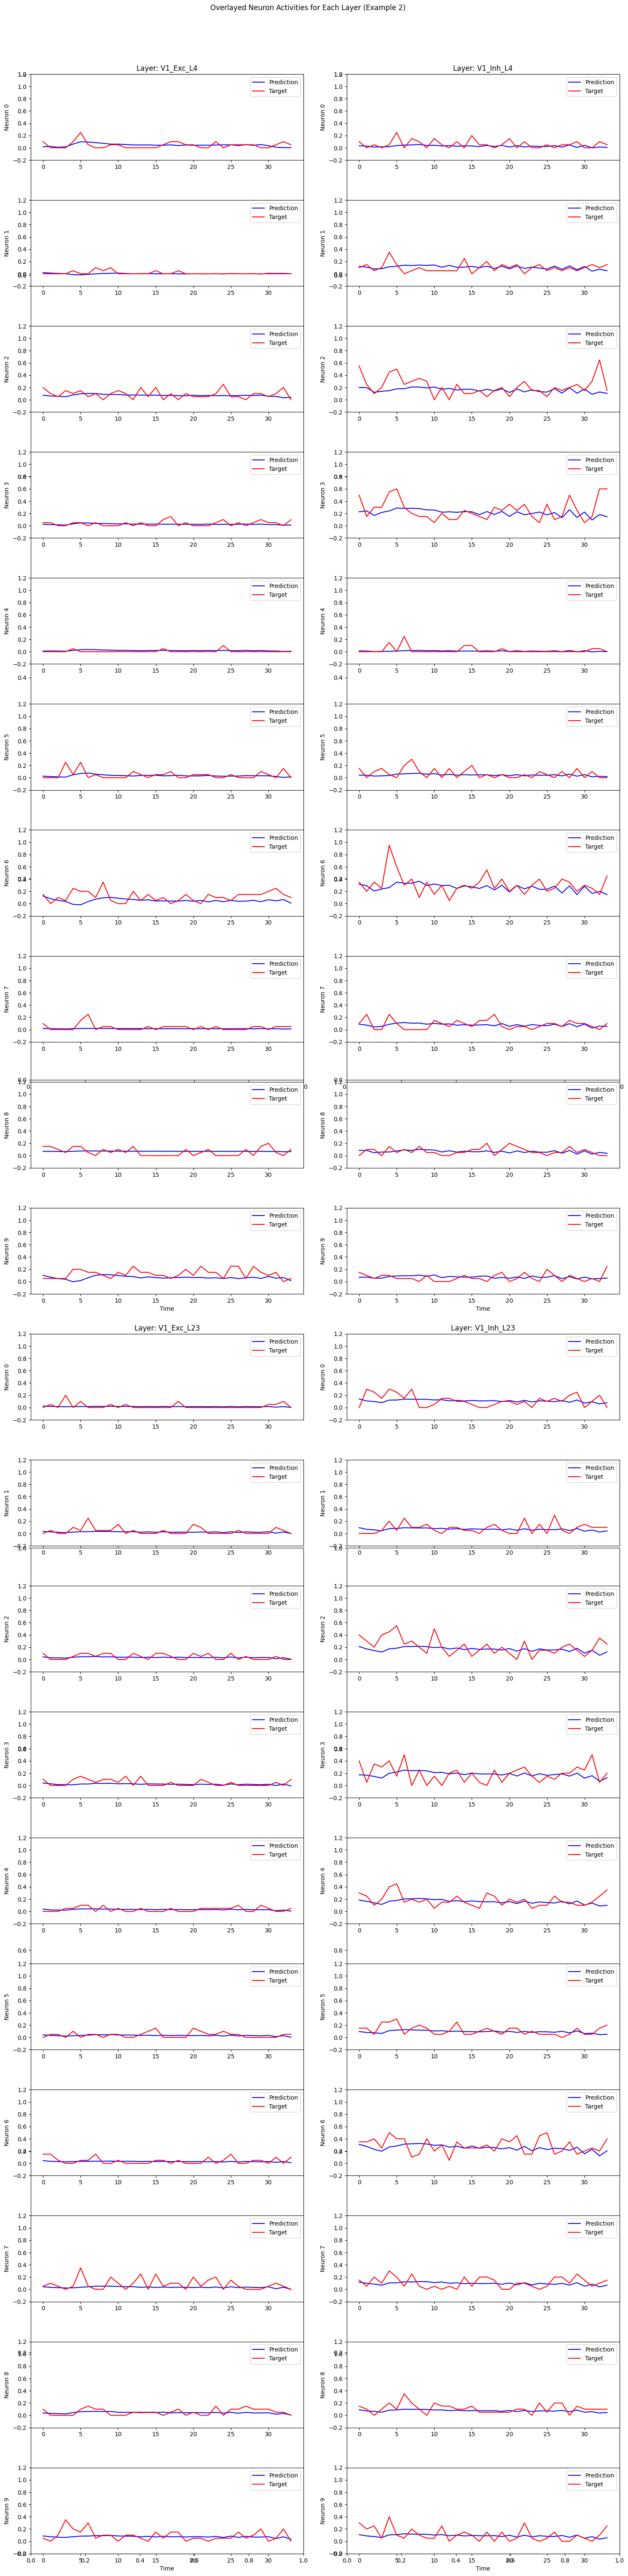

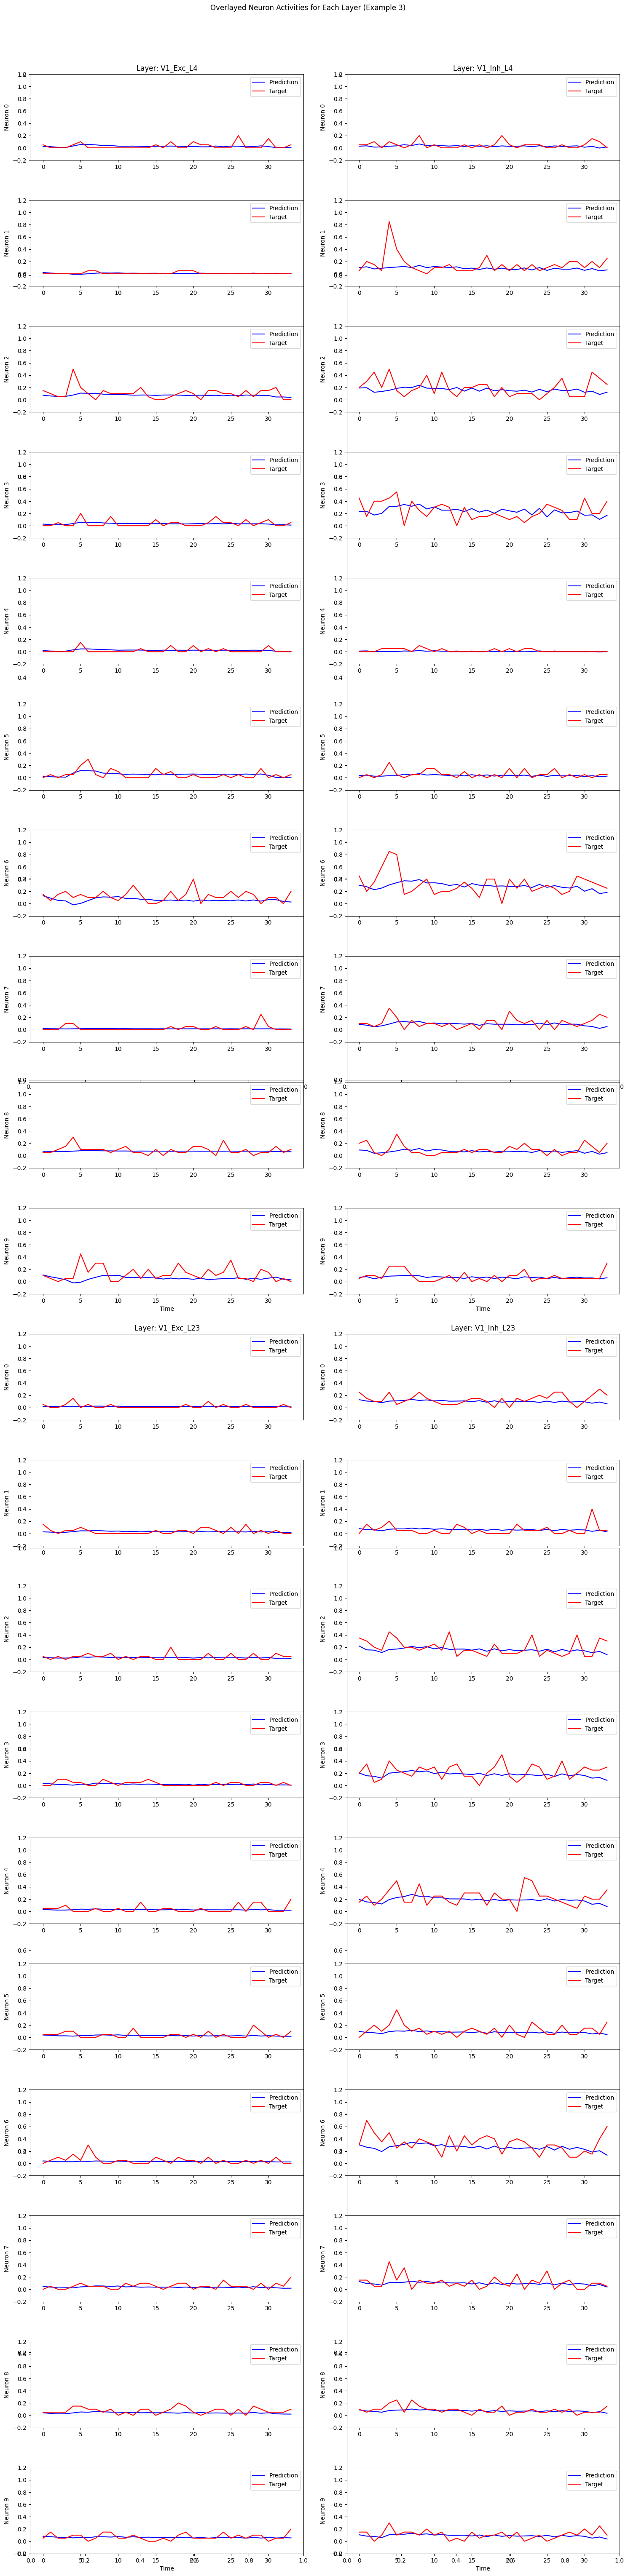

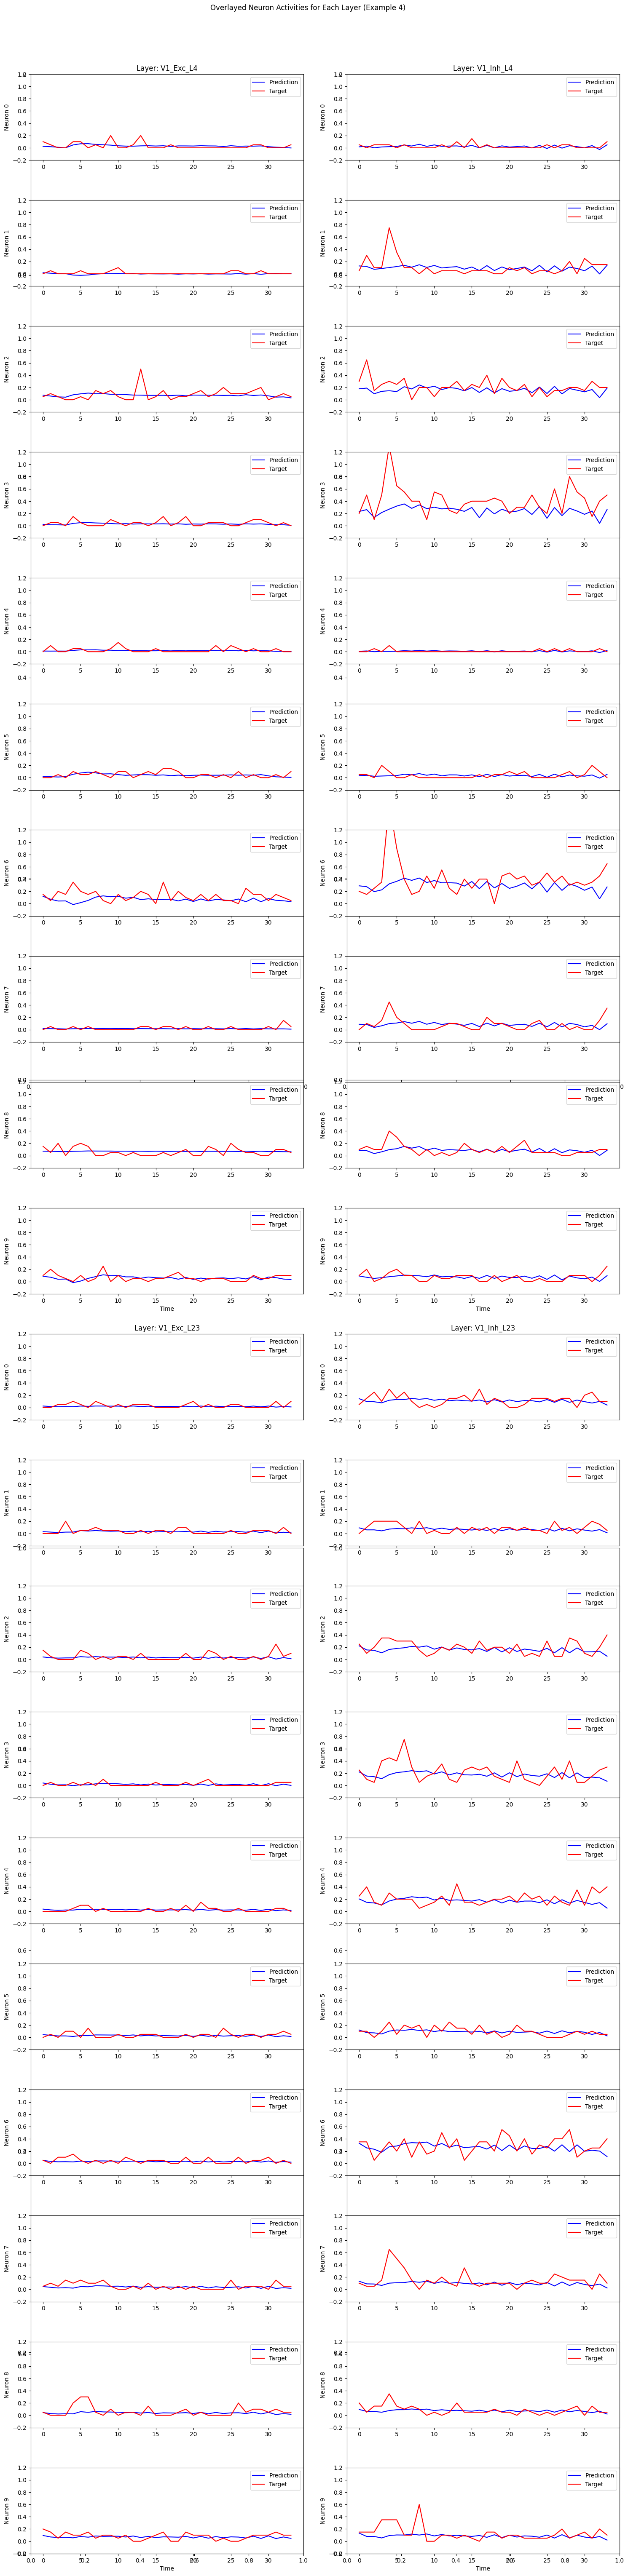

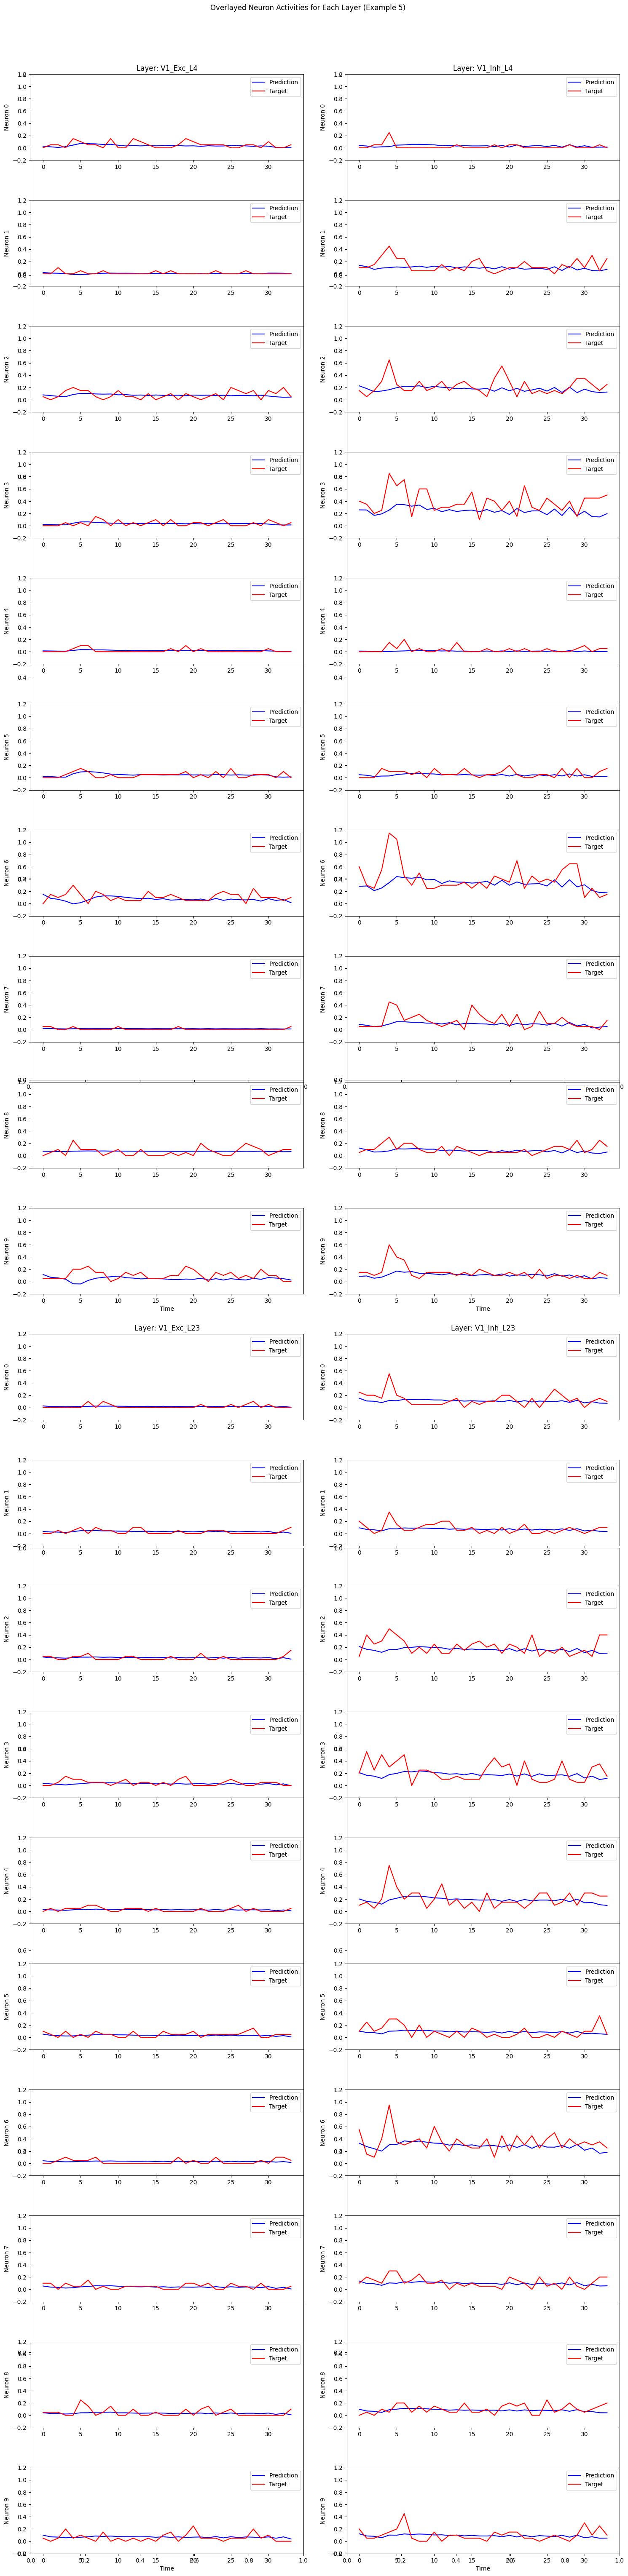

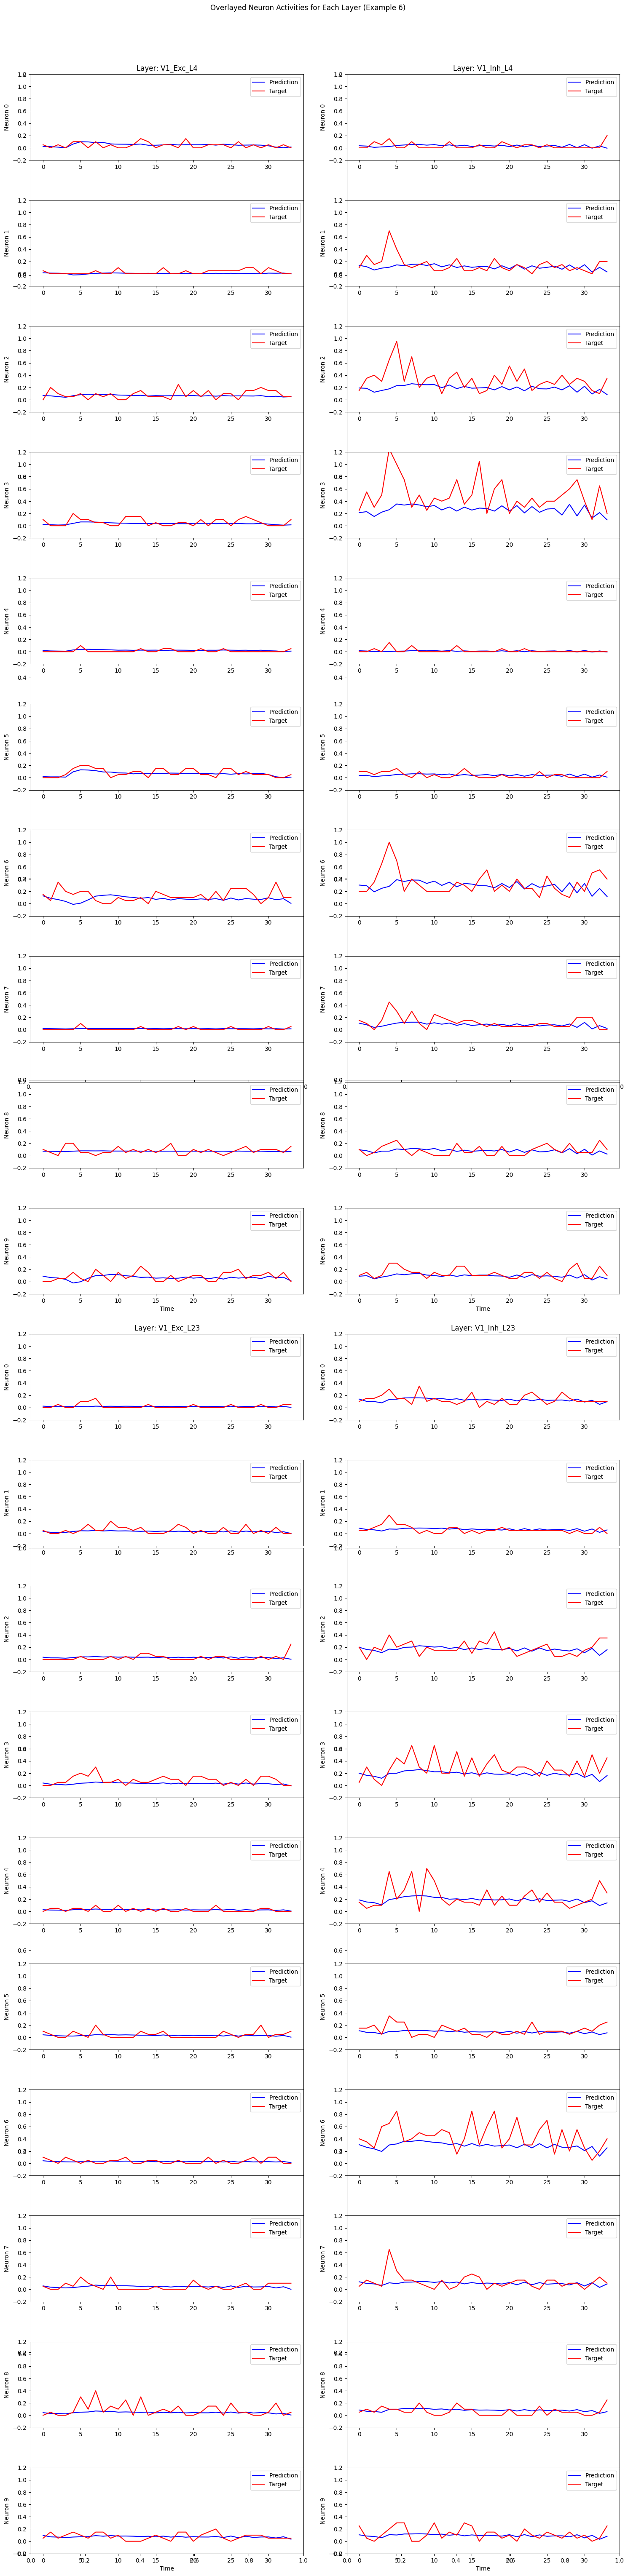

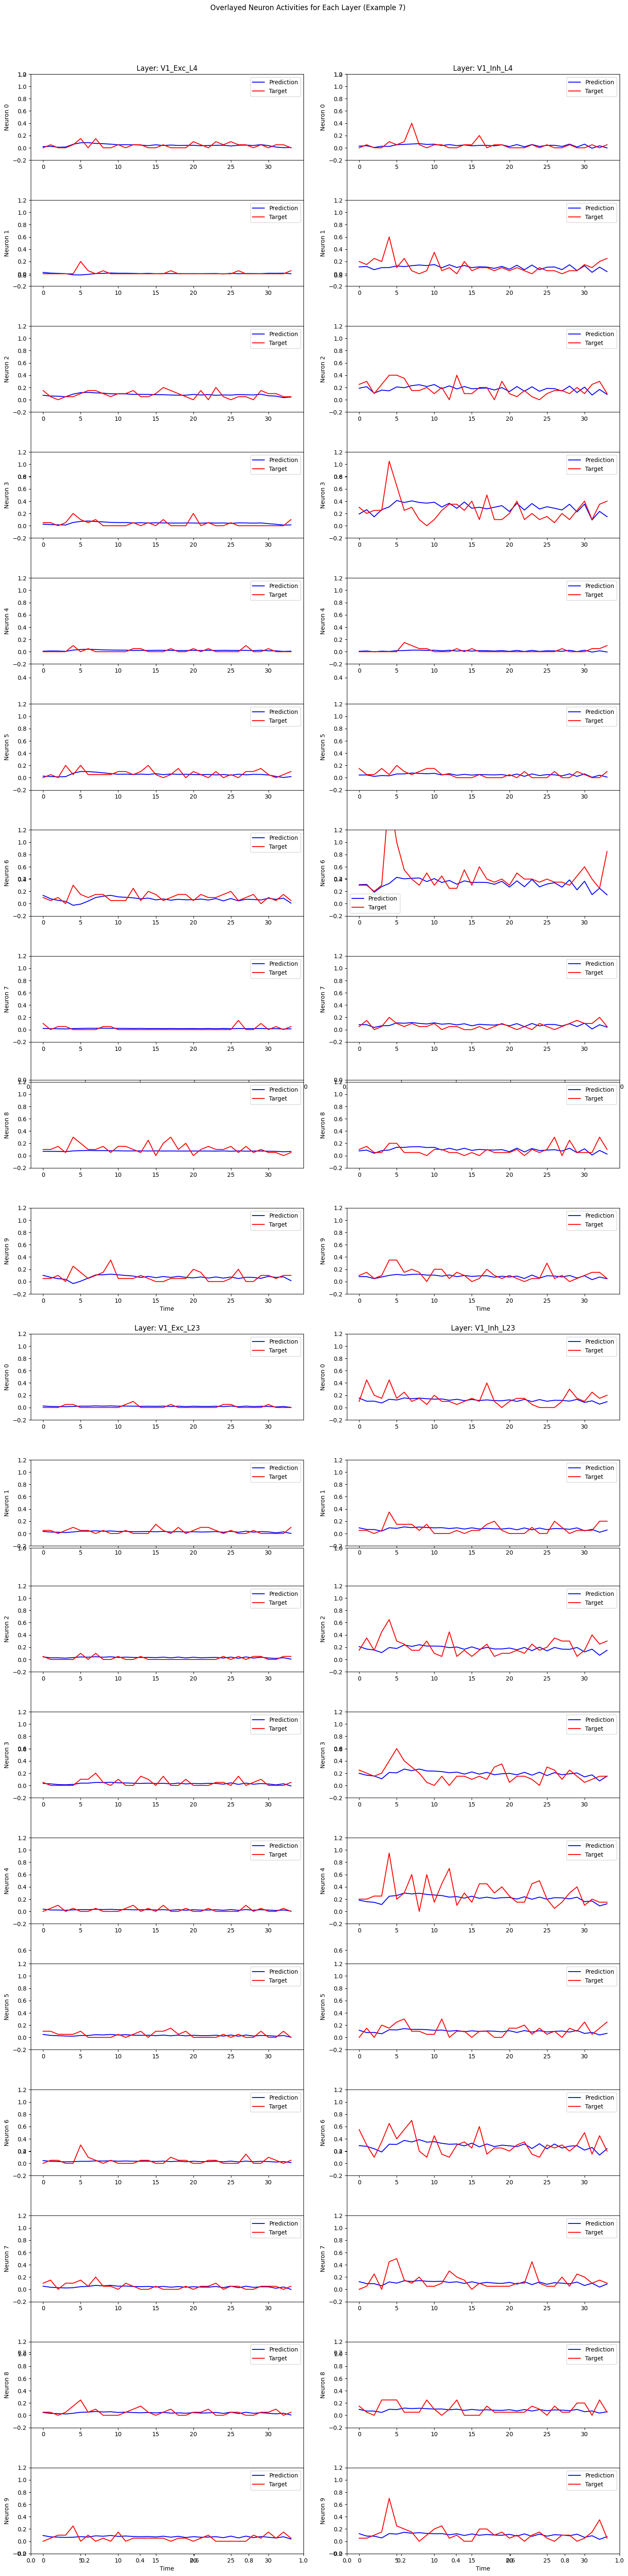

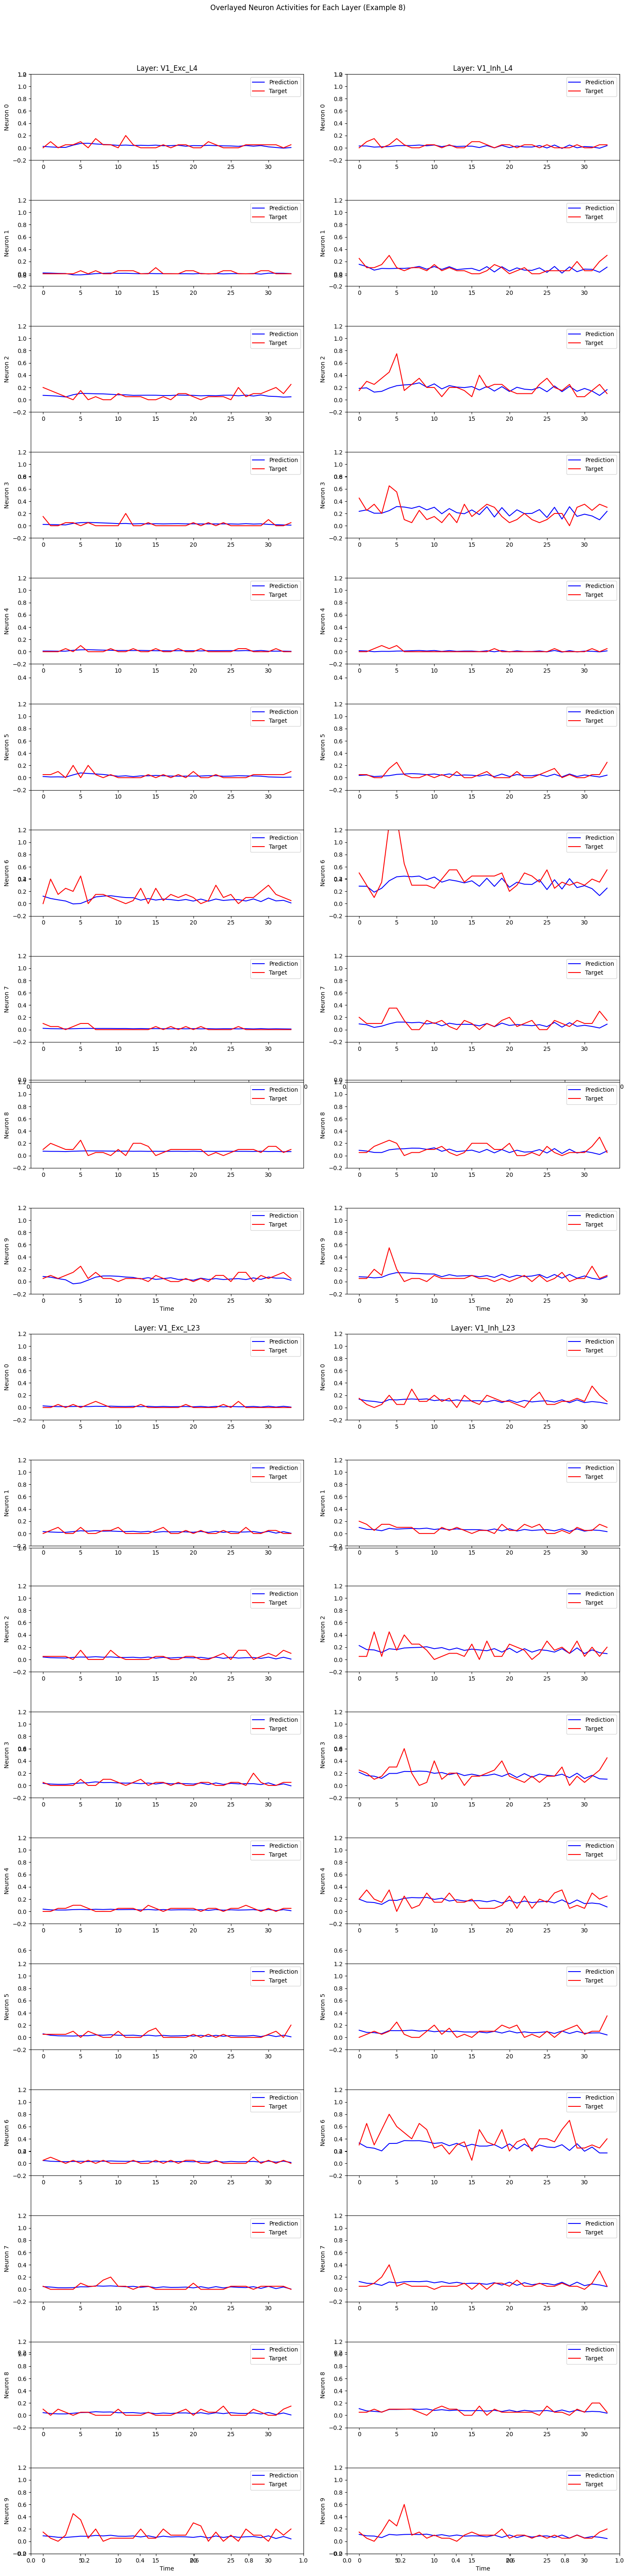

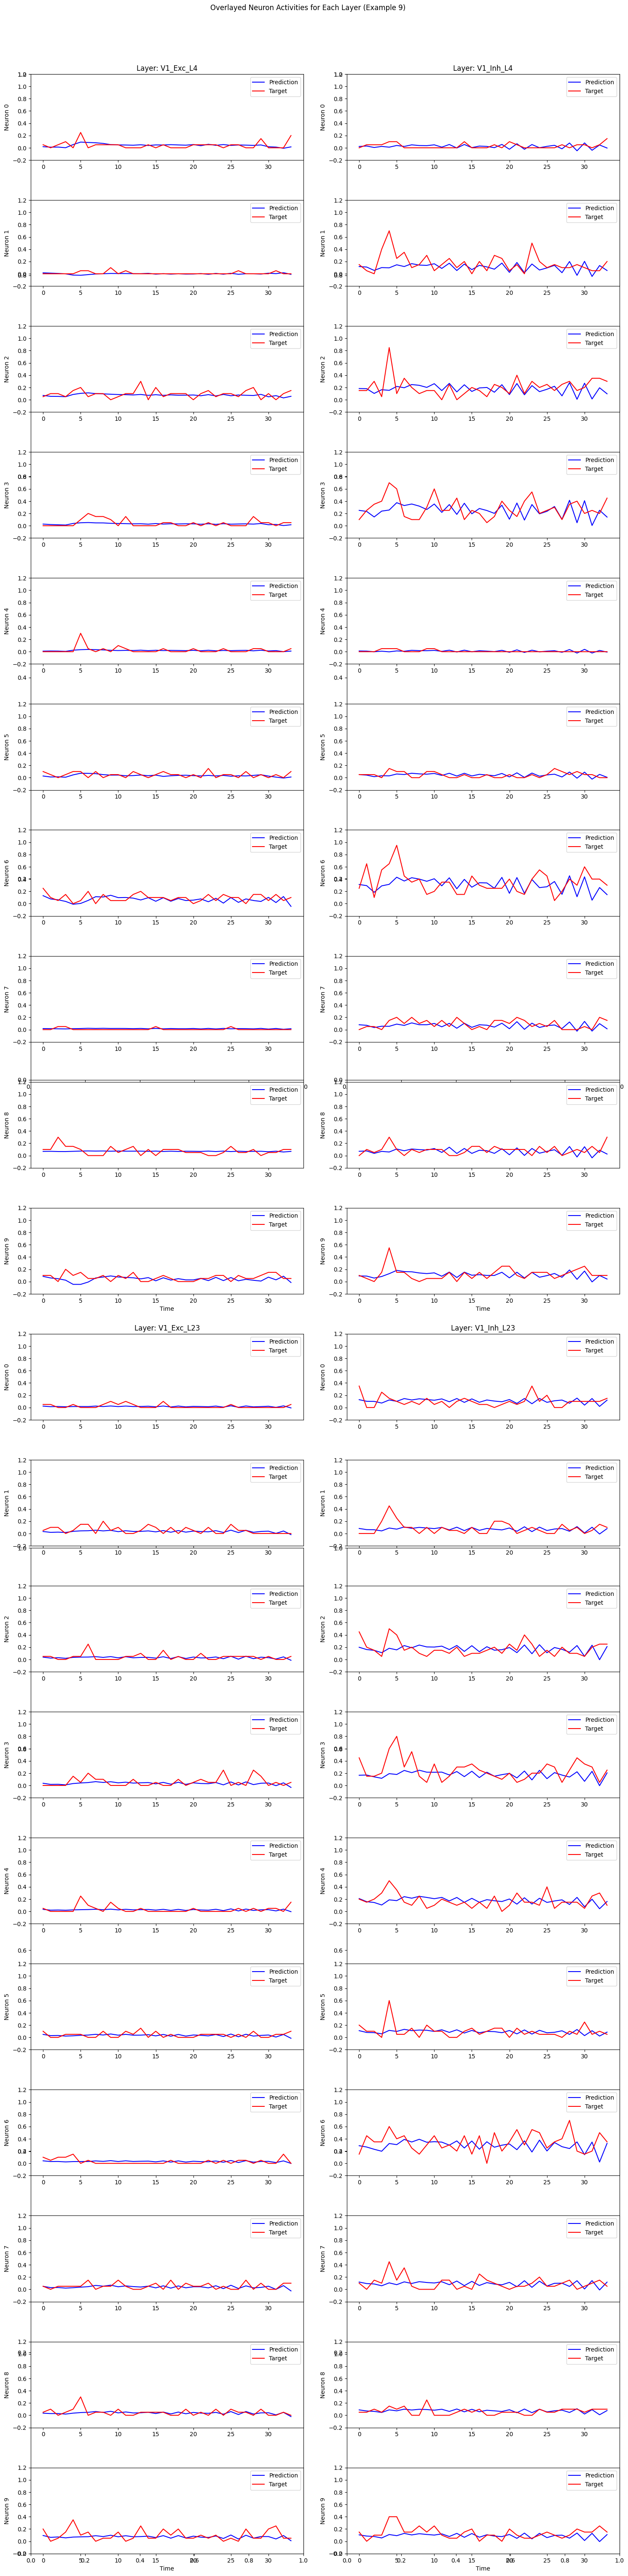

In [3]:
for i in range(10):
    plot_neuron_activities(i, neurons_to_show=10), #save_fig=True)